# Exercise - KNeighborsClassifier - Digits - Solution

### Introducing the exercise

This exercise uses the **digits** dataset - a built-in dataset in sklearn. It consists of 1797 images of the digits from 0 to 9. Each image is of size 8x8. Therefore, the inputs will be of shape (1797, 64). On the other hand, the targets will consist of 1797 rows and 1 column and corresponds to the digit of the specific image. 

The beginning of the code is implemented. That is, the dataset is loaded in a variable called **digits**. This variable is defined to help us easily display the digits. The variables **inputs** and **target** are also defined.

Your task will be to split the data into training and testing (use an 80-20 split) and find the model that best classifies the digits. Do this for two scenarios:

**Scenario 1:**

With the help of principal component analysis (PCA), the 2 most important principal components have been extracted. Use those to train your model. Display the decision boundaries of the best model. Print out the confusion matrix and the classification report. How is the model performing? Which are the digits that are classified correctly almost always and which are the ones that are amolst never classified correctly?

**Scenario 2:**

In this scenario, use all 64 features (all 64 pixels from the figure). How many neighbors does the best model have now? Study the confusion matrix and the classification report. What is the accuracy compared to the model from **Scenario 1**?

**Optional task**

Let's spice things up! Your task is to draw your own 8x8 digits. This can be done using **Paint**, for example. To make sure that the figure you are drawing is indeed 8x8, click the **Resize** button, choose **Pixels**, and type 8 for **Horizontal** and 8 for **Vertical**. Do a research on how to import the figures and extract the values of each pixel. Using your models from both **Scenario 1** and **Scenario 2**, try to predict the digits you have drawn.

Don't forget to have fun with this exercise! I sure had while designing it! :)

### Import the relevant libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

import numpy as np

import time

import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and displaying the inputs (common for both Scenarios)

In [2]:
digits = load_digits()
inputs, target = load_digits(return_X_y=True)

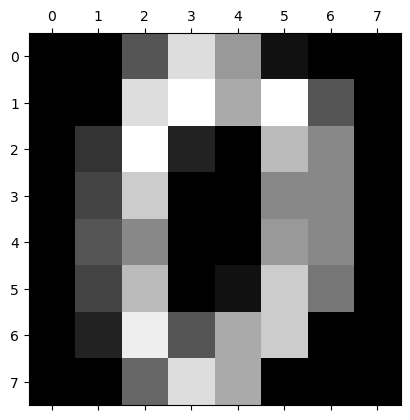

In [3]:
# Change the number in the square brackets to display a different digit
plt.matshow(digits.images[0], cmap = 'gray');

### Perform a train-test-split and a principal component analysis. Uncomment when using only the 2 most important principal components of the digits (Scenario 1)

In [4]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_scaled = scaler.fit_transform(x_train_raw)
x_test_scaled = scaler.transform(x_test_raw)

x_train = pca.fit_transform(x_train_scaled)
x_test = pca.transform(x_test_scaled)

### Perform a train-test-split. Uncomment when using all features of the figures (Scenario 2)

In [5]:
# x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
#                                                     test_size=0.2, 
#                                                     random_state=365, 
#                                                     stratify = target)

### Performing a grid search (common for both Scenarios)

In [6]:
parameters = {'n_neighbors':range(1, 80), 
              'weights':['uniform', 'distance']}

In [7]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [8]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 80),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [9]:
grid_search.best_params_

{'n_neighbors': 32, 'weights': 'uniform'}

In [10]:
clf = grid_search.best_estimator_

### Draw decision boundaries. Uncomment when using only the 2 most important features of the figure (Scenario 1)

Time elapsed: 93.5 seconds


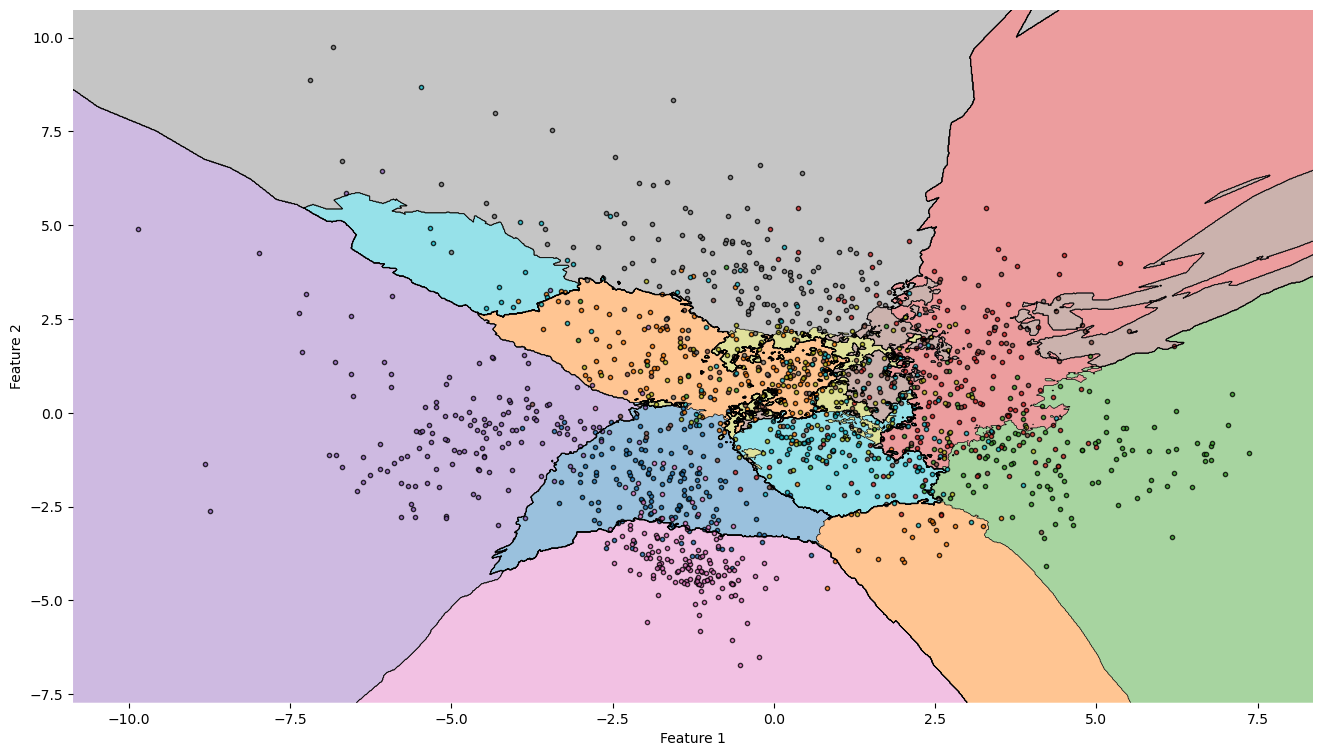

In [11]:
%matplotlib inline

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train,
                      clf = clf,
                      markers = '.',
                      legend = 0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

### Make predictions on the test set. Display the confusion matrix and classification report (common for both Scenarios)

In [12]:
y_test_pred = clf.predict(x_test)

In [13]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        36
           1       0.50      0.73      0.59        37
           2       0.78      0.71      0.75        35
           3       0.53      0.49      0.51        37
           4       0.94      0.89      0.91        36
           5       0.38      0.28      0.32        36
           6       0.78      0.86      0.82        36
           7       0.76      0.78      0.77        36
           8       0.21      0.14      0.17        35
           9       0.32      0.42      0.36        36

    accuracy                           0.59       360
   macro avg       0.59      0.59      0.58       360
weighted avg       0.59      0.59      0.58       360



### Open the images of the manually drawn digits and display all 10 of them. The digits are stored in the 'digits-figures' folder (common for both Scenarios)

In [15]:
from PIL import Image

predict_image = np.empty([10, 64])

for i in range(10):
    predict_image[i] = np.array(Image.open(f'digits-figures\\digit-{i}.png').convert('L')).flatten()

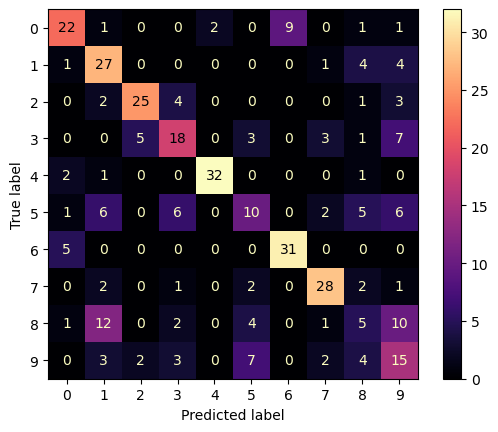

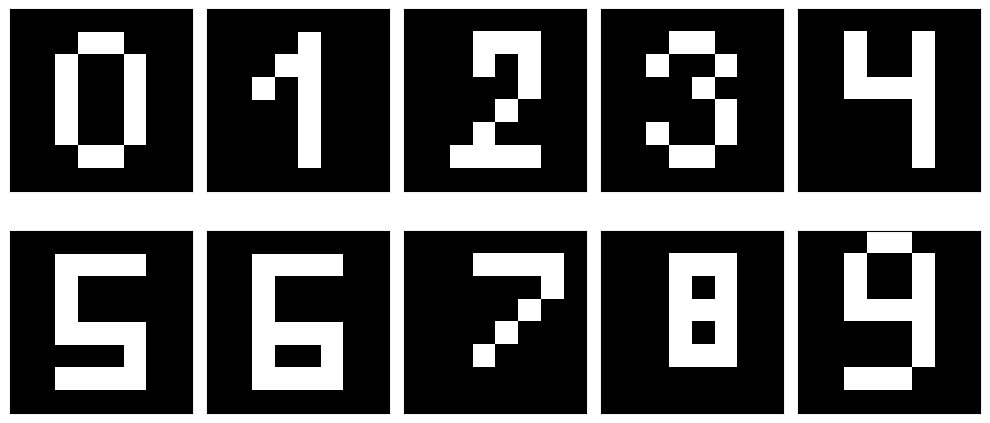

In [16]:
fig, axs = plt.subplots(2, 5, 
                        figsize=(10, 5), 
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(10):
    axs[i//5, i%5].imshow(predict_image[i].reshape(8,8), cmap = 'gray')

plt.tight_layout()
plt.show()

### Transform the images to be predicted and then predict their class. Uncomment when using only the 2 most important features of the digits (Scenario 1)

In [17]:
predict_image_reduced = pca.transform(predict_image)
clf.predict(predict_image_reduced)

array([4, 7, 7, 4, 7, 4, 4, 7, 7, 7])

### Predict the classes of the images. Uncomment when using all features of the figures (Scenario 2)

In [18]:
# clf.predict(predict_image)